<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**

## Scope of this project 🖼️

For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using **our** custom dataset (available on JULIE). 🤓

## Deliverable 📬

To complete this project, your team should: 

- Create some visualizations
- Train at least one **linear regression model** on the dataset, that predicts the amount of weekly sales as a function of the other variables
- Assess the performances of the model by using a metric that is relevant for regression problems
- Interpret the coefficients of the model to identify what features are important for the prediction
- Train at least one model with **regularization (Lasso or Ridge)** to reduce overfitting


## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Part 1 : EDA and data preprocessing

Start your project by exploring your dataset : create figures, compute some statistics etc...

Then, you'll have to make some preprocessing on the dataset. You can follow the guidelines from the *preprocessing template*. There will also be some specific transformations to be planned on this dataset, for example on the *Date* column that can't be included as it is in the model. Below are some hints that might help you 🤓

 #### Preprocessing to be planned with pandas

 **Drop lines where target values are missing :**
 - Here, the target variable (Y) corresponds to the column *Weekly_Sales*. One can see above that there are some missing values in this column.
 - We never use imputation techniques on the target : it might create some bias in the predictions !
 - Then, we will just drop the lines in the dataset for which the value in *Weekly_Sales* is missing.
 
**Create usable features from the *Date* column :**
The *Date* column cannot be included as it is in the model. Either you can drop this column, or you will create new columns that contain the following numeric features : 
- *year*
- *month*
- *day*
- *day of week*

**Drop lines containing invalid values or outliers :**
In this project, will be considered as outliers all the numeric features that don't fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$. This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*
 


**Target variable/target (Y) that we will try to predict, to separate from the others** : *Weekly_Sales*

 **------------**

 #### Preprocessings to be planned with scikit-learn

 **Explanatory variables (X)**
We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

 - Categorical variables : Store, Holiday_Flag
 - Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

### Part 2 : Baseline model (linear regression)
Once you've trained a first model, don't forget to assess its performances on the train and test sets. Are you satisfied with the results ?
Besides, it would be interesting to analyze the values of the model's coefficients to know what features are important for the prediction. To do so, the `.coef_` attribute of scikit-learn's LinearRegression class might be useful. Please refer to the following link for more information 😉 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Part 3 : Fight overfitting
In this last part, you'll have to train a **regularized linear regression model**. You'll find below some useful classes in scikit-learn's documentation :
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

**Bonus question**

In regularized regression models, there's a hyperparameter called *the regularization strength* that can be fine-tuned to get the best generalized predictions on a given dataset. This fine-tuning can be done thanks to scikit-learn's GridSearchCV class : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Also, you'll find here some examples of how to use GridSearchCV together with Ridge or Lasso models : https://alfurka.github.io/2018-11-18-grid-search/

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:\

Store - the store number
Date - the week of sales
Weekly_Sales - sales for the given store
Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
Temperature - Temperature on the day of sale
Fuel_Price - Cost of fuel in the region
CPI – Prevailing consumer price index
Unemployment - Prevailing unemployment rate
Holiday Events\
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

#   Plan

1. Introduction
2. Importing libraries
3. Importing data
4. Functions
5. Exploratory Data Analysis
6. Data preprocessing
    - Transformer
    - Preprocessor
7. Baseline Linear Regression model
8. Multivariable model
    - Linear Regression
    - Lasso
    - Ridge
9. Conclusion

#   Introduction


In this notebook, we aim to predict weekly sales using a dataset that requires preprocessing and exploration. We'll start with exploratory data analysis (EDA) to understand our data, followed by preprocessing steps including handling missing values, transforming the 'Date' column into more useful features, and removing outliers.

We'll identify categorical and numerical variables for processing and then split our data into features (X) and the target variable (Y), which is 'Weekly_Sales'.

Our approach includes building a baseline linear regression model to establish initial performance metrics. Based on these results, we'll explore regularization techniques (Ridge and Lasso) to improve model performance and prevent overfitting. We'll also consider fine-tuning model hyperparameters using GridSearchCV.

This process involves utilizing pandas for data manipulation, scikit-learn for model building and evaluation, and potentially matplotlib or seaborn for any additional data visualization. The goal is to develop a model that accurately predicts weekly sales, using a pragmatic and straightforward approach.

#  Importing Libraries

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso

import warnings #To avoid warnings to take a lot of space
warnings.filterwarnings("ignore")


# Importing Data

In [3]:
""" Import dataset
"""
print("Loading dataset...")
dataset = pd.read_csv("Walmart_Store_sales.csv")
print("...Done.")
print()

Loading dataset...
...Done.



In [4]:
"""Depiction of dataset variables and statistics"""
#Dataset information
print('Dataset information')
print(dataset.info())
#Top 5 rows of dataset
display('Dataset:', dataset.head())
print('General statistics of the dataset:')
display(dataset.describe(include='all'))
print('Number of rows:', dataset.shape[0])
print('Number of columns:', dataset.shape[1])

print('Missing values for each variable')
display(dataset.isnull().sum())
print('percentage of missing value')
display(dataset.isnull().sum()/dataset.shape[0]*100)

Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB
None


'Dataset:'

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


General statistics of the dataset:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


Number of rows: 150
Number of columns: 8
Missing values for each variable


Store            0
Date            18
Weekly_Sales    14
Holiday_Flag    12
Temperature     18
Fuel_Price      14
CPI             12
Unemployment    15
dtype: int64

percentage of missing value


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [413]:
# The dataset contains 150 rows and 8 columns. The columns are:
# Store - the store number
# Date - the week of sales
# Weekly_Sales - sales for the given store
# Holiday_Flag - whether the week is a special holiday week 1 – holiday week 0 – non-holiday week
# Temperature - temperature on the day of sale
# Fuel_Price - fuel price on the day of sale
# CPI - the consumer price index
# Unemployment - the unemployment rate

# The target variable is Weekly_Sales, which is the sales for the given store. The other variables are the features.
# The target is missing 10.3% of the values, thus thus the rows with missing values will be deleted.
# The missing values for the features will be imputed according to the following strategy:
# - For the categorical variables, the missing values will be replaced by the most frequent value
# - For the numerical variables, the missing values will be replaced by the median value
# - In the case of the variable Date, the NaN rows will be deleted, since it is difficult to impute the date.

In [414]:
# Extract indices of rows with NaN 'Weekly_Sales'
Weekly_Sales_nan_indices = dataset[dataset['Weekly_Sales'].isna()].index
# Drop these indices from the dataset
data_temp = dataset.drop(index=Weekly_Sales_nan_indices)

# Extract indices of rows with NaN 'Date'
Date_nan_indices = data_temp[data_temp['Date'].isna()].index
# Drop these indices from the dataset
data = data_temp.drop(index=Date_nan_indices)

#Checking information
print('dataset information')
print(data.info())

#Checking missing values
print('percentage of missing value')
display(data.isna().sum() / data.count() * 100)


dataset information
<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         118 non-null    float64
 1   Date          118 non-null    object 
 2   Weekly_Sales  118 non-null    float64
 3   Holiday_Flag  109 non-null    float64
 4   Temperature   107 non-null    float64
 5   Fuel_Price    107 non-null    float64
 6   CPI           109 non-null    float64
 7   Unemployment  107 non-null    float64
dtypes: float64(7), object(1)
memory usage: 8.3+ KB
None
percentage of missing value


Store            0.000000
Date             0.000000
Weekly_Sales     0.000000
Holiday_Flag     8.256881
Temperature     10.280374
Fuel_Price      10.280374
CPI              8.256881
Unemployment    10.280374
dtype: float64

In [415]:
"""Here we convert the variable Date into several variables ['day', 'month', 'year', 'dayofweek].
Using the to_datetime method to convert the format first, then using dt and dt.strftime.
The obtained variables are then added as columns in the dataframe data"""
# Convert the 'date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
# Change the format of the dates using dt.day, dt.month, dt.year, dt.strftime
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year
data['dayofweek'] = data['Date'].dt.strftime('%A')

#Dropping the column Date
data = data.drop(columns='Date')

display(data.head())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,dayofweek
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,18,2,2011,Friday
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,25,3,2011,Friday
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,28,5,2010,Friday
5,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,28,5,2010,Friday
6,15.0,695396.19,0.0,69.80,4.069,134.855161,7.658,3,6,2011,Friday


#   Functions

In [416]:
"""Function to find the list of colums from the transformers.
The for loops through the transformers (here we will input preprocessor).

[('num',
Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())]),

['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'day', 'month']),

('cat',
Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(drop='first'))]),
                
['Store', 'Holiday_Flag']),
('remainder', 'drop', [1, 9, 10])]

And return the list of features names
"""

def get_feature_names(column_transformer):
    # Initialize an empty list to collect feature names
    new_feature_names = []
    
    # Loop through each transformer in the ColumnTransformer
    for transformer_in_columns in column_transformer.transformers_:
        
        # Unpack the transformer name, the transformer object, and the original feature names
        transformer_name, transformer, orig_feature_names = transformer_in_columns
        
        # Process each transformer that is not named 'remainder'
        # (The 'remainder' transformer usually just passes through remaining columns)
        if transformer_name != 'remainder':
            
            # Check if the transformer has the method 'get_feature_names_out'
            if hasattr(transformer, 'get_feature_names_out'):
                # For transformers with a get_feature_names_out method
                names = transformer.get_feature_names_out(orig_feature_names)
                new_feature_names.extend(names)
            else:
                # For transformers without a get_feature_names_out method
                new_feature_names.extend(orig_feature_names)
    
    return new_feature_names

#  Exploratory Data Analysis

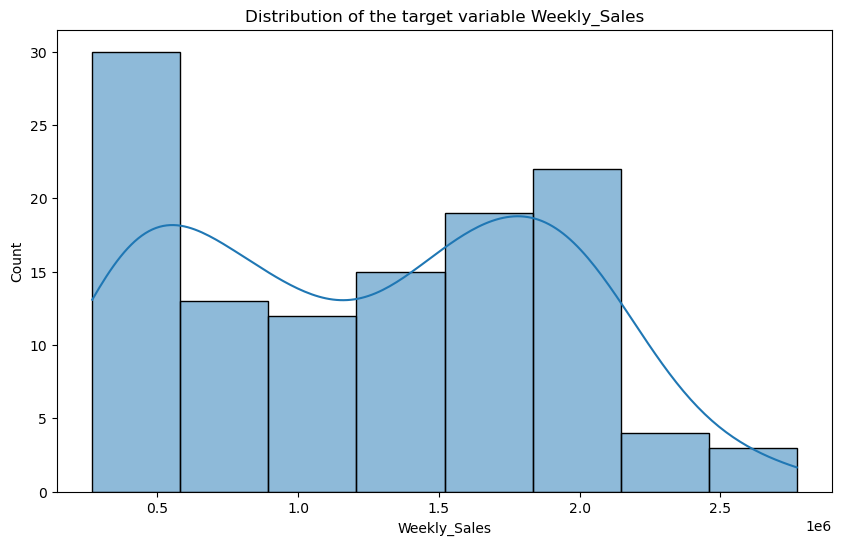

In [417]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['Weekly_Sales'], kde=True)
plt.title('Distribution of the target variable Weekly_Sales')
plt.show()

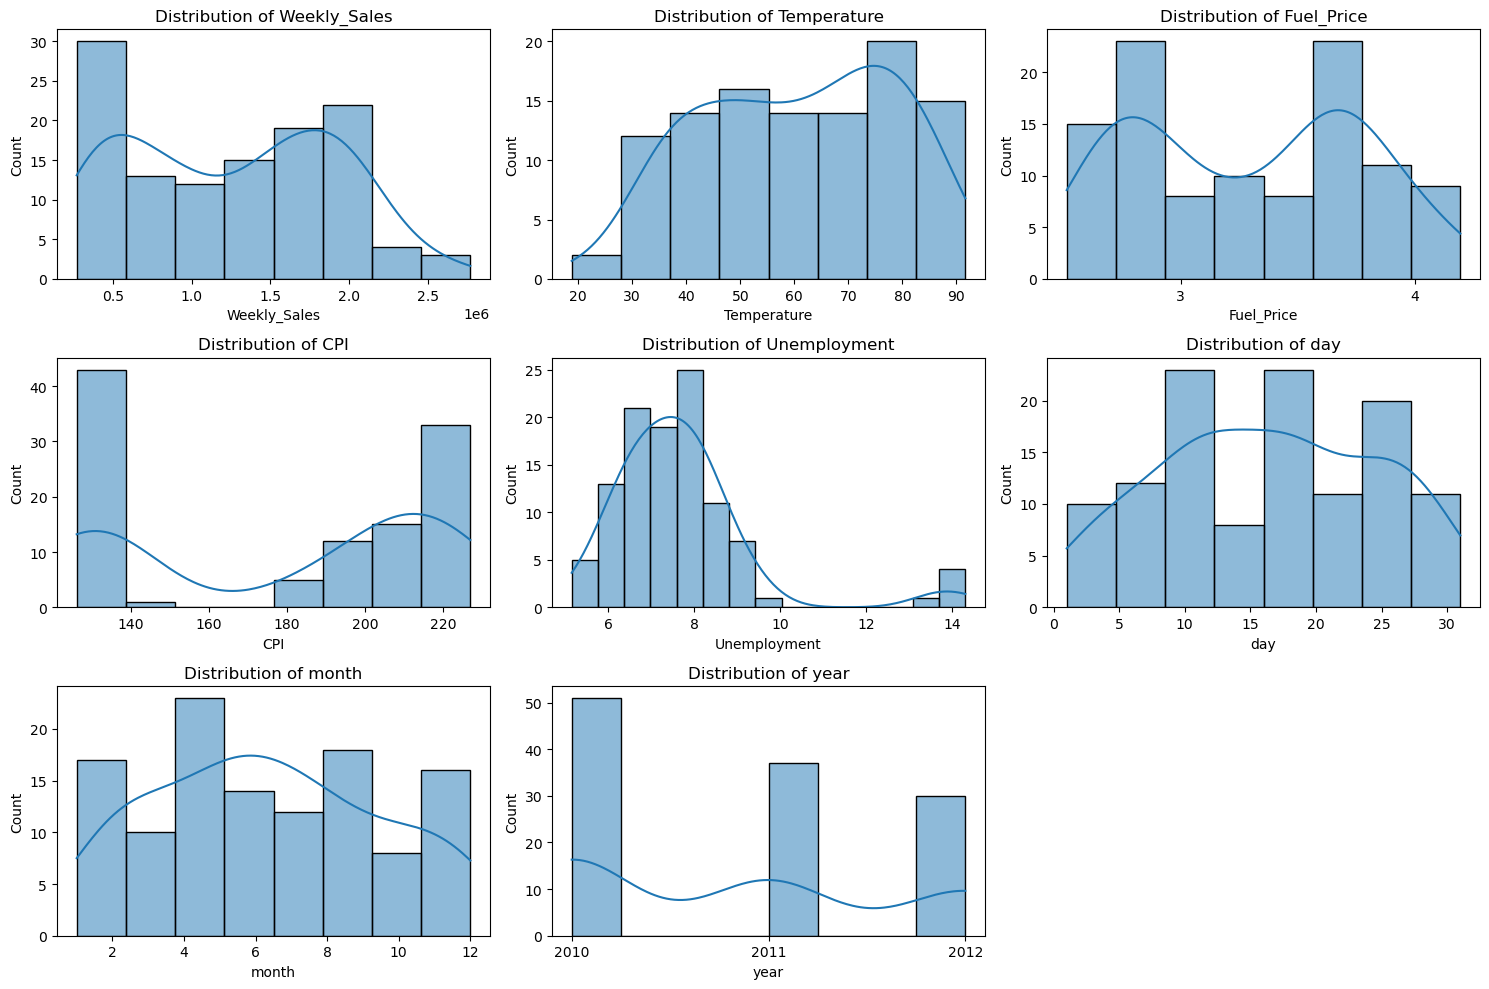

In [418]:
# The distribution of the target variable is right-skewed, with a long tail to the right. This means that the majority of the sales are low, but there are some stores with very high sales.

# Distribution of the numerical variables
numerical_variables = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'day', 'month', 'year']
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_variables):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribution of {var}')
    # No decimal labels
    plt.gca().xaxis.get_major_locator().set_params(integer=True)
plt.tight_layout()



In [419]:
# The numerical variables are not normally distributed. The variable 'Fuel_Price' has a bimodal distribution. The variable 'CPI' has a distribution with two peaks, 
# and the variable 'Unemployment' has a normal distribution with an outlier. The variable 'Temperature' is right-skewed.
# The variables 'day', 'month', and 'year' are discrete variables, in a month we can see a few peaks, over the year we can observe specific periods with higher sales.
# The variable 'yea' shows the trend of the sales over the years, in a slight decrease.

In [420]:
# Show Unemployment rows where value greater than 10
display(data[data['Unemployment'] > 10])


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,dayofweek
30,12.0,1021154.48,0.0,68.40,4.193,129.044433,13.736,6,5,2011,Friday
62,12.0,1295605.35,0.0,52.77,3.236,126.879484,14.313,17,12,2010,Friday
68,12.0,955913.68,0.0,91.04,3.701,129.201581,13.503,12,8,2011,Friday
93,12.0,964332.51,0.0,NaN,4.087,129.062355,13.736,27,5,2011,Friday
135,12.0,903119.03,1.0,83.63,3.044,126.114581,14.180,10,9,2010,Friday


In [421]:
# Show rows for store 12
display(data[data['Store'] == 12])

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,dayofweek
30,12.0,1021154.48,0.0,68.40,4.193,129.044433,13.736,6,5,2011,Friday
62,12.0,1295605.35,0.0,52.77,3.236,126.879484,14.313,17,12,2010,Friday
68,12.0,955913.68,0.0,91.04,3.701,129.201581,13.503,12,8,2011,Friday
93,12.0,964332.51,0.0,NaN,4.087,129.062355,13.736,27,5,2011,Friday
135,12.0,903119.03,1.0,83.63,3.044,126.114581,14.180,10,9,2010,Friday


In [422]:
# The outlier is due to Store 12, which has a very high unemployment rate. This is a valid value, so it will not be removed.

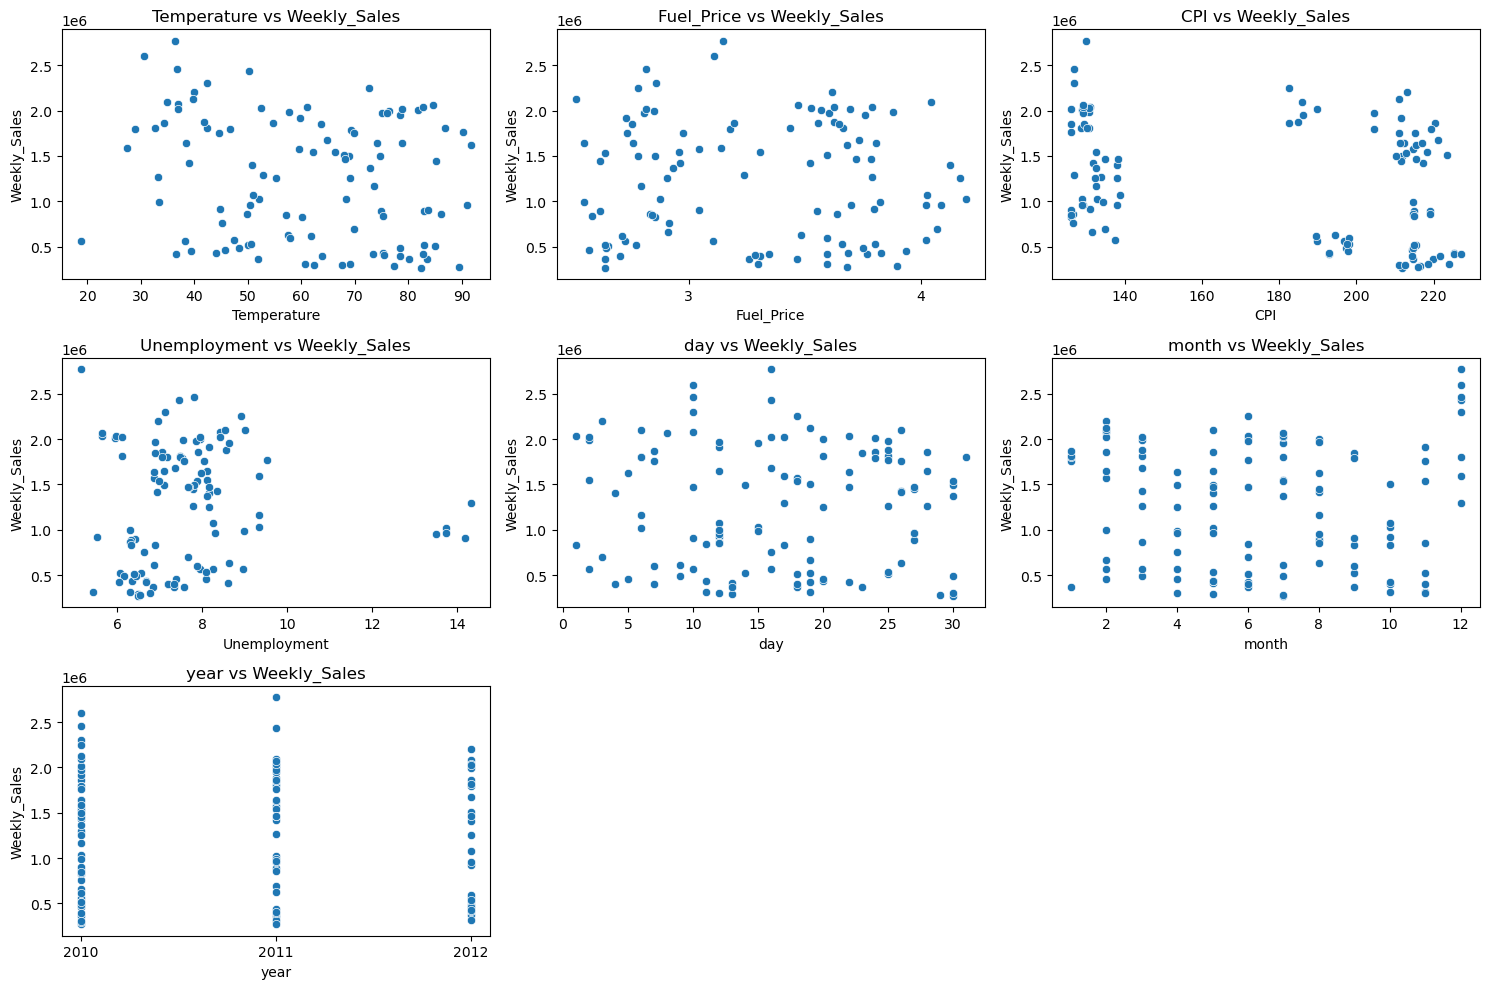

In [423]:
# Plot variables against the target variable
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_variables[1:]):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=data[var], y=data['Weekly_Sales'])
    plt.title(f'{var} vs Weekly_Sales')
    # No decimal labels
    plt.gca().xaxis.get_major_locator().set_params(integer=True)
plt.tight_layout()


<Figure size 1500x1000 with 0 Axes>

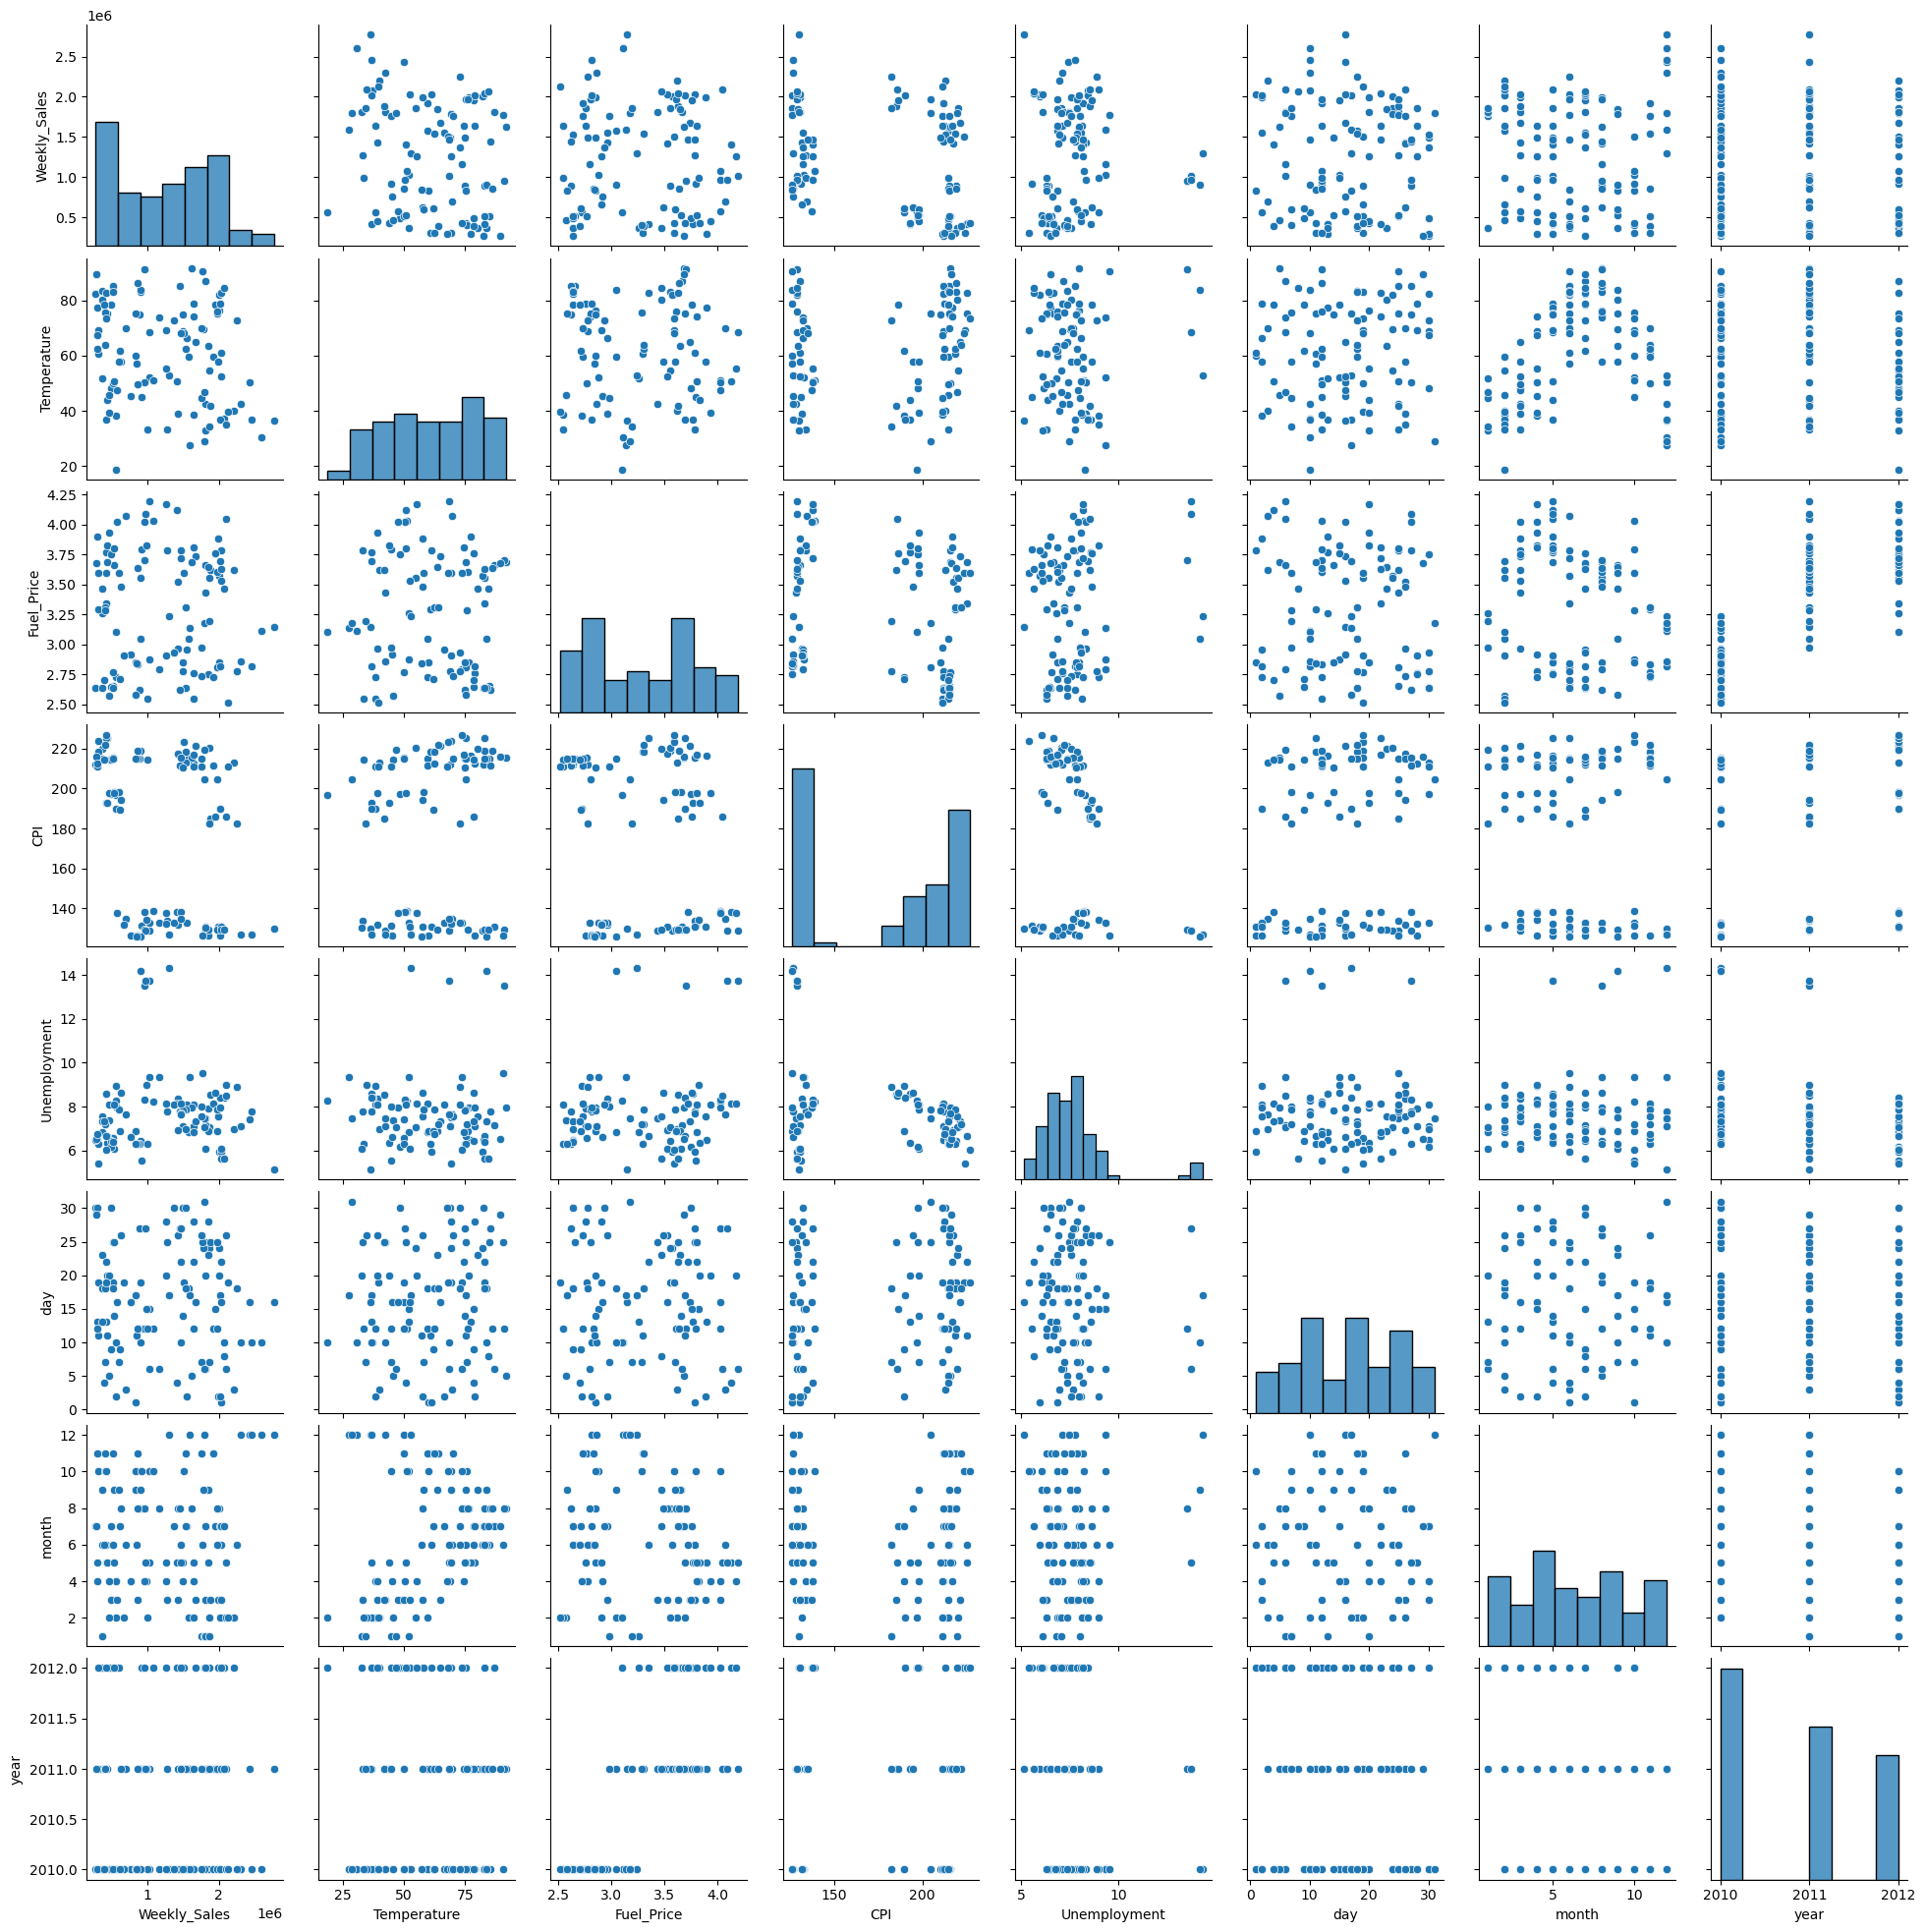

In [424]:
# Bivariate analysis of the numerical variables
plt.figure(figsize=(15, 10))
sns.pairplot(data[numerical_variables], kind='scatter')
plt.show()



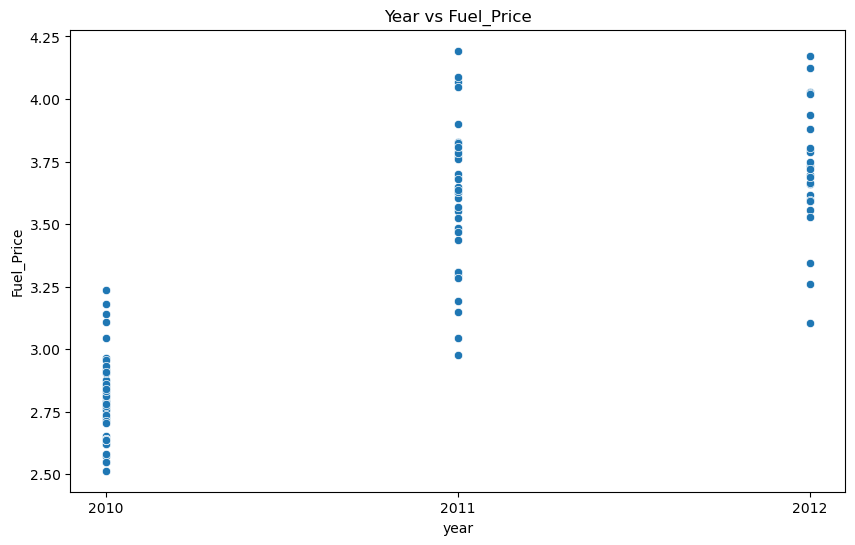

In [425]:
# It is difficult to see a clear relationship between the numerical variables and the target variable.
# Although we can see a trend between year and fuel price.
# Plot year vs Fuel_Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['year'], y=data['Fuel_Price'])
plt.title('Year vs Fuel_Price')
# No decimal labels
plt.gca().xaxis.get_major_locator().set_params(integer=True)
plt.show()


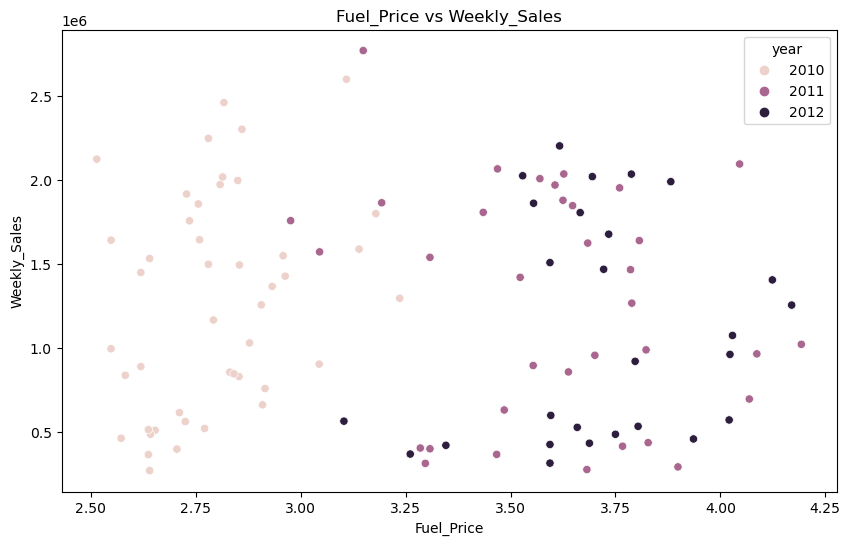

In [426]:
# After 2010, the fuel price increased, this is an important information to take into account and to contextualize a potential relationship between the fuel price and the sales.
# Plot fuel price vs Weekly_Sales for the years 2010, 2011, and 2012
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Fuel_Price'], y=data['Weekly_Sales'], hue=data['year'])
plt.title('Fuel_Price vs Weekly_Sales')
plt.show()


In [427]:
# Correlation coefficients for numerical variables with the target variable Weekly_Sales in absolute values
correlation = data[numerical_variables].corr().abs()
correlation['Weekly_Sales'].sort_values(ascending=False)

Weekly_Sales    1.000000
CPI             0.327443
Temperature     0.203033
year            0.037837
Unemployment    0.034997
Fuel_Price      0.034540
day             0.030752
month           0.015093
Name: Weekly_Sales, dtype: float64

In [428]:
# Highest correlation is with the variable 'CPI', thus we will use this relationship to propose a baseline model.

#   Preprocessing

In [429]:
# Number of unique values
print('Number of unique values')
display(data.nunique())

Number of unique values


Store            20
Weekly_Sales    118
Holiday_Flag      2
Temperature     107
Fuel_Price       99
CPI             107
Unemployment     88
day              30
month            12
year              3
dayofweek         1
dtype: int64

In [430]:
# Dayofweek has only 1 unique value 'Friday', it does not provide more information, thus it will be removed
data = data.drop(columns='dayofweek')

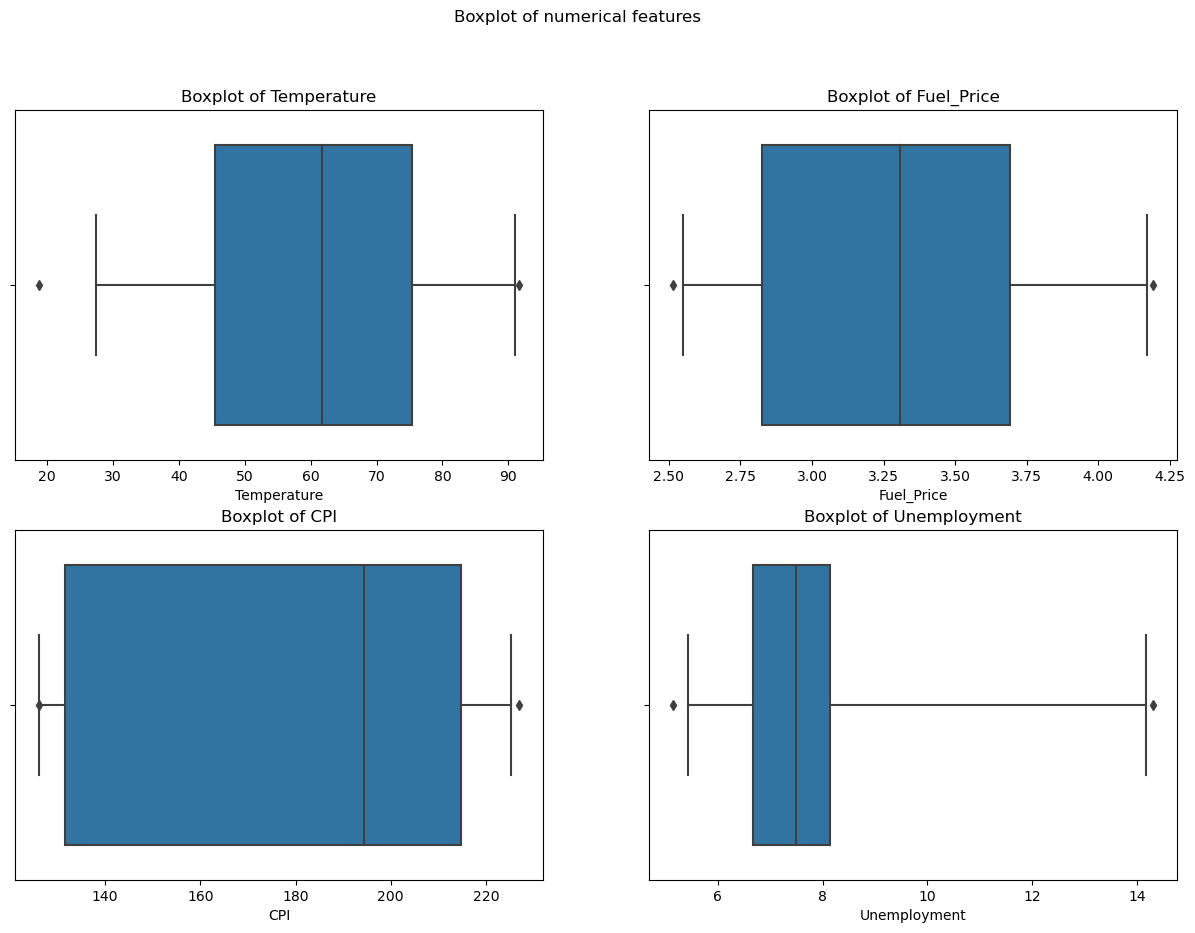

In [431]:
# Plot boxplot the statistical distribution of the numerical features in separate subplots
numerical_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Boxplot of numerical features')

# Plot boxplot for each numerical feature
for i, variable in enumerate(numerical_features):
    # Boxplot for mean + 3*std and mean - 3*std
    sns.boxplot(x=variable, data=data, ax=axes[i//2, i%2], whis=(0.3, 99.7))
    axes[i//2, i%2].set_title(f'Boxplot of {variable}')
plt.show()


In [432]:
# We can see the outliers in the variables 'Temperature', 'CPI', 'Unemployment', and 'Fuel_Price'. The lines containing outliers will be removed.
# Remove outliers of numerical features
print('Number of rows before removing outliers:', data.shape[0])
for var in numerical_features:
    # Calculate the z-score for each observation of the variable
    z = np.abs((data[var] - data[var].mean()) / data[var].std())
    # Keep only the rows where the z-score is less than or equal to 3
    data = data[z <= 3]
print('Number of rows after removing outliers:', data.shape[0])



Number of rows before removing outliers: 118
Number of rows after removing outliers: 80


## Baseline Model: Linear Regression

In order to provide a baseline for a prediction model, we are going to look at the relationship between 'Weekly Sales' and 'CPI' using Linear Regression. The plan is as follows:

- **Presentation of the relationship**
  - Scatter plot of CPI against Weekly Sales
  
- **Separation of Variables:**
  - Separate the variable X (CPI) and the target y (Weekly Sales).

- **Data Splitting:**
  - Split the variables into training set and test set.

- **Description of dataset:**

- **Preprocessing:**
  - Use `SimpleImputer` to replace missing values.
  - Use `StandardScaler` to normalize the values.

- **Linear Regression Model:**
  - Declare the Linear Regression model.
  - Fit the model on `X_train` and `y_train`.
  - Apply the model to predict `y_train` and `y_test`.

- **Model Assessment:**
  - Assess the results of the model to define the baseline.



In [433]:
# Initialize table to store the results, format the results to 2 decimal places
# Columns are the model name, CrossVal mean, CrossVal std, R2 train score, R2 test score and RMSE/(Max - Min) of the test score
results = pd.DataFrame(columns=['Model', 'CrossVal mean', 'CrossVal std', 'R2 train score', 'R2 test score', 'RMSE/(Max - Min)'])

**Presentation of the relationship**
  - Scatter plot of CPI against Weekly Sales

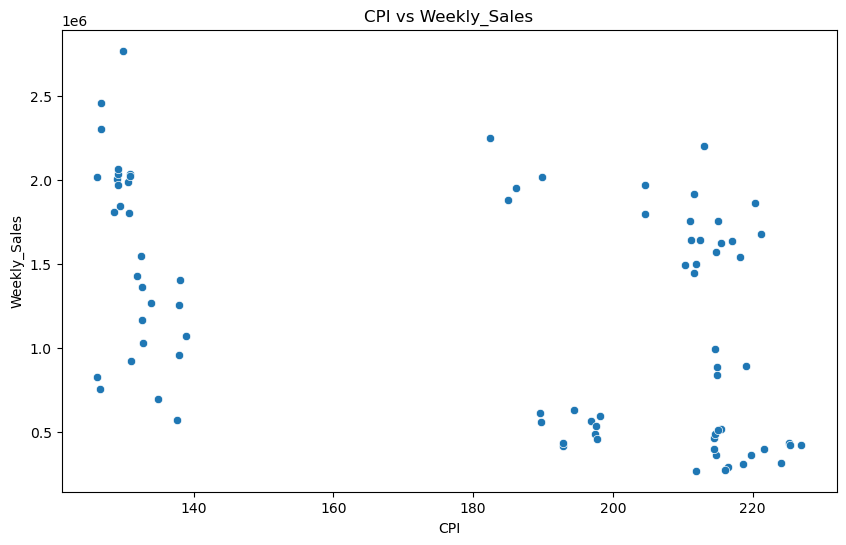

In [434]:
""" Figure describing the relation between CPI and Weekly Sales, 
from a brief observation we are very pessimistic on the quality
of a linear regression between the two variables.
"""
# Plot CPI vs Weekly_Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['CPI'], y=data['Weekly_Sales'])
plt.title('CPI vs Weekly_Sales')
plt.show()


**Separation of Variables:**
  - Separate the variable X (CPI) and the target y (Weekly Sales).

In [435]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ["CPI"]
target_variable = "Weekly_Sales"

X_LR = data.loc[:,features_list]
Y_LR = data.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y_LR.head())
print()
print('X :')
print(X_LR.head())

Separating labels from features...
...Done.

Y : 
0    1572117.54
1    1807545.43
4    1644470.66
6     695396.19
7    2203523.20
Name: Weekly_Sales, dtype: float64

X :
          CPI
0  214.777523
1  128.616064
4  212.412888
6  134.855161
7  213.023622


**Data Splitting:**
  - Split the variables into training set and test set.

In [436]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_LR_train, X_LR_test, Y_LR_train, Y_LR_test = train_test_split(
    X_LR,
    Y_LR,
    test_size = 0.2,
    random_state = 42)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



**Preprocessing:**
  - Use `SimpleImputer` to replace missing values.
  - Use `StandardScaler` to normalize the values.

In [437]:
# Preprocessing
print("Preprocessing X_train...")
print(X_LR_train.head())
print()
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # impute missing values with median
    ('scaler', StandardScaler()) # standard scaler to scale the data
])
X_LR_train = preprocessor.fit_transform(X_LR_train)
print("...Done!")
print(X_LR_train[0:5,:]) # X_train is now a numpy array
print() 

Preprocessing X_train...
            CPI
136  129.112500
110  204.643227
99   126.139200
63   224.019287
14   126.234600

...Done!
[[-1.27690132]
 [ 0.67152339]
 [-1.35360191]
 [ 1.171357  ]
 [-1.35114093]]



**Linear Regression Model:**
  - Declare the Linear Regression model.
  - Fit the model on `X_train` and `y_train`.
  - Apply the model to predict `y_train` and `y_test`.

In [438]:
# Test pipeline
print("Preprocessing X_test...")
print(X_LR_test.head())
print()
X_LR_test = preprocessor.transform(X_LR_test)   # Preprocess the test data with the same pipeline
print("...Done!")
print(X_LR_test[0:5,:]) # X_test is now a numpy array
print() 

Preprocessing X_test...
           CPI
48  215.544618
0   214.777523
38  129.066300
49  197.413326
28  126.562100

...Done!
[[ 0.9527406 ]
 [ 0.93295228]
 [-1.27809312]
 [ 0.48501761]
 [-1.34269259]]



In [439]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_LR_train, Y_LR_train)
scores_baseline = cross_val_score(regressor, X_LR_train, Y_LR_train, cv=5, scoring='r2')
print("...Done.")

# Print all scores
print("All scores:", scores_baseline)
print("Mean:", scores_baseline.mean())
print("Standard deviation:", scores_baseline.std())

Train model...
...Done.
All scores: [-0.21866852  0.17784901 -0.28299693  0.25472686  0.42853423]
Mean: 0.07188893243269526
Standard deviation: 0.2764853422627132


In [440]:
# Predictions on training set
print("Predictions on training set...")
Y_LR_train_pred = regressor.predict(X_LR_train)
print("...Done.")
print(Y_LR_train_pred)
print()

Predictions on training set...
...Done.
[1611492.94849917 1020640.82235428 1634752.10015071  869068.24915114
 1634005.81721002  939492.94340977  907783.36248539 1545220.15166277
 1174347.40648941  939142.84674986 1584100.34763356  976096.96624197
 1595880.1985594  1599498.49898544  941298.59219465 1542570.77212566
 1113082.57496401  970406.26938033 1165385.65215077 1081060.96172102
  931437.24931199 1100929.5184219  1629634.50790962 1534837.017761
  943567.07095273 1566569.99082246 1113041.5215796  1136422.18749412
  891030.19912245  940573.19344229 1582933.5076587  1608318.24757092
 1611193.54197371  858995.97807846 1021232.84845468 1194310.45950755
 1541709.23540667  898351.1972218  1605347.73481822  969019.45273036
  914430.19329577 1542140.0041573   944122.14431355  845994.8319911
 1629634.50790962 1137499.07143073 1597046.61767449 1075826.81948482
 1584223.99592154 1074777.5339362  1138920.40327557  940121.64454487
 1584822.58993763 1615376.40075078  942310.81313949  902532.044789

**Model Assessment:**
  - Assess the results of the model to define the baseline.

In [441]:
# Predictions on test set
print("Predictions on test set...")
Y_LR_test_pred = regressor.predict(X_LR_test)
print("...Done.")
print(Y_LR_test_pred)
print()

Predictions on test set...
...Done.
[ 935362.81022651  941363.54227851 1611854.35596101 1077197.9673221
 1631443.89202054  963662.24577753  963918.26697996 1610796.10015403
  955083.73197923  927620.37426008  936202.43798709  965743.88313597
 1071865.07558169 1598920.87129574  887654.93504503  966476.02190281]



In [442]:
# Metrics for the model evaluation
print("Metrics for the model evaluation...")
r2_train = r2_score(Y_LR_train, Y_LR_train_pred)
r2_test = r2_score(Y_LR_test, Y_LR_test_pred)

# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_LR_train, Y_LR_train_pred))
print("R2 score on test set : ", r2_score(Y_LR_test, Y_LR_test_pred))

# Metrics for model evaluation
print("MSE : ", mean_squared_error(Y_LR_test, Y_LR_test_pred))
print("RMSE : ", np.sqrt(mean_squared_error(Y_LR_test, Y_LR_test_pred)))
print("Variance : ", np.var(Y_LR_test))
print("RMSE / Variance : ", np.sqrt(mean_squared_error(Y_LR_test, Y_LR_test_pred)) / np.var(Y_LR_test))
print("RMSE / (max(Y) - min(Y)) : ", np.sqrt(mean_squared_error(Y_LR_test, Y_LR_test_pred)) / (np.max(Y_LR_test) - np.min(Y_LR_test)))

""" Following the linear regression, the R2 score shows a very bad result, 
which is going to serve as a baseline."""

Metrics for the model evaluation...
R2 score on training set :  0.2025956760133769
R2 score on test set :  0.08666857092732505
MSE :  426396360458.9288
RMSE :  652990.3218723297
Variance :  466858302349.0806
RMSE / Variance :  1.3986906060933107e-06
RMSE / (max(Y) - min(Y)) :  0.33753348996824983


' Following the linear regression, the R2 score shows a very bad result, \nwhich is going to serve as a baseline.'

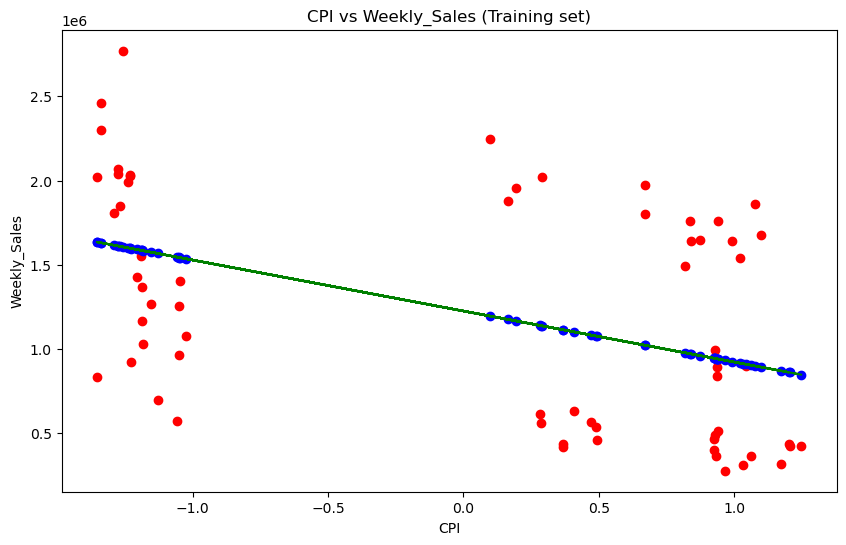

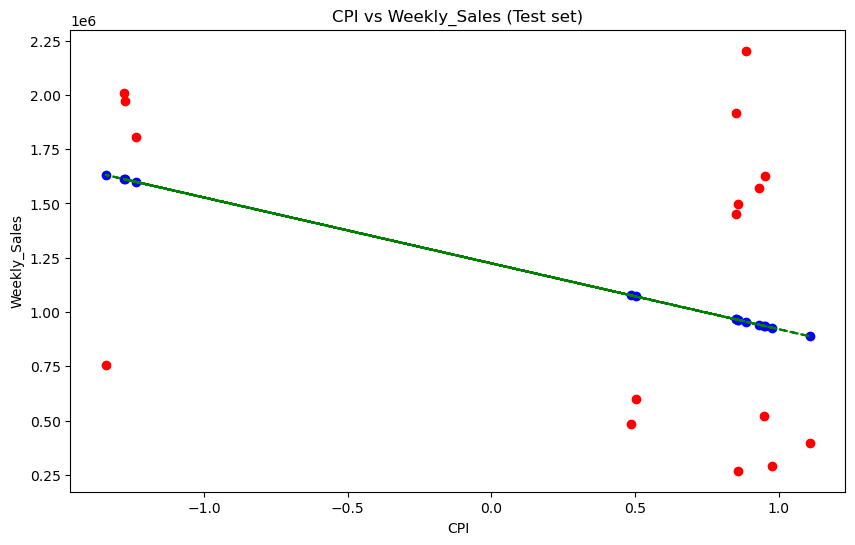

In [443]:
# Visualize the predictions on the training set
plt.figure(figsize=(10, 6))
plt.scatter(X_LR_train, Y_LR_train, color = 'red')
plt.scatter(X_LR_train, Y_LR_train_pred, color = 'blue')
# Add trend line
z = np.polyfit(X_LR_train.flatten(), Y_LR_train_pred, 1) # 1st degree polynomial
p = np.poly1d(z) # create a polynomial function
plt.plot(X_LR_train, p(X_LR_train), "g--")
plt.title('CPI vs Weekly_Sales (Training set)')
plt.xlabel('CPI')
plt.ylabel('Weekly_Sales')
plt.show()

# Visualize the predictions on the test set
plt.figure(figsize=(10, 6))
plt.scatter(X_LR_test, Y_LR_test, color = 'red')
plt.scatter(X_LR_test, Y_LR_test_pred, color = 'blue')
# Add trend line
z = np.polyfit(X_LR_test.flatten(), Y_LR_test_pred, 1) # 1st degree polynomial
p = np.poly1d(z) # create a polynomial function
plt.plot(X_LR_test, p(X_LR_test), "g--")
plt.title('CPI vs Weekly_Sales (Test set)')
plt.xlabel('CPI')
plt.ylabel('Weekly_Sales')
plt.show()

In [444]:
# Store results
results = results._append({
    'Model': 'Baseline Linear Regression',
    'CrossVal mean': scores_baseline.mean(),
    'CrossVal std': scores_baseline.std(),
    'R2 train score': r2_train,
    'R2 test score': r2_test,
    'RMSE/(Max - Min)': np.sqrt(mean_squared_error(Y_LR_test, Y_LR_test_pred)) / (np.max(Y_LR_test) - np.min(Y_LR_test))
}, ignore_index=True)

## Predictions multivariable with models: LinearRegression, Ridge, Lasso

Now that we obtain a baseline that is not satisfactory, we are going to look
at multivariable fitting with regression models.


- **Preparing dataset:**

- **Separation of Variables:**
  - Separate the variable X (CPI) and the target y (Weekly Sales).

- **Data Splitting:**
  - Split the variables into training set and test set.

- **Description of dataset:**

- **Preprocessing:**
  - Use `SimpleImputer` to replace missing values.
  - Use `StandardScaler` to normalize the values.

- **Linear Regression Model:**
  - Declare the Linear Regression model.
  - Fit the model on `X_train` and `y_train`.
  - Apply the model to predict `y_train` and `y_test`.

- **Model Assessment:**
  - Assess the results of the model to define the baseline.

**Preparing dataset:**

<Axes: xlabel='day'>

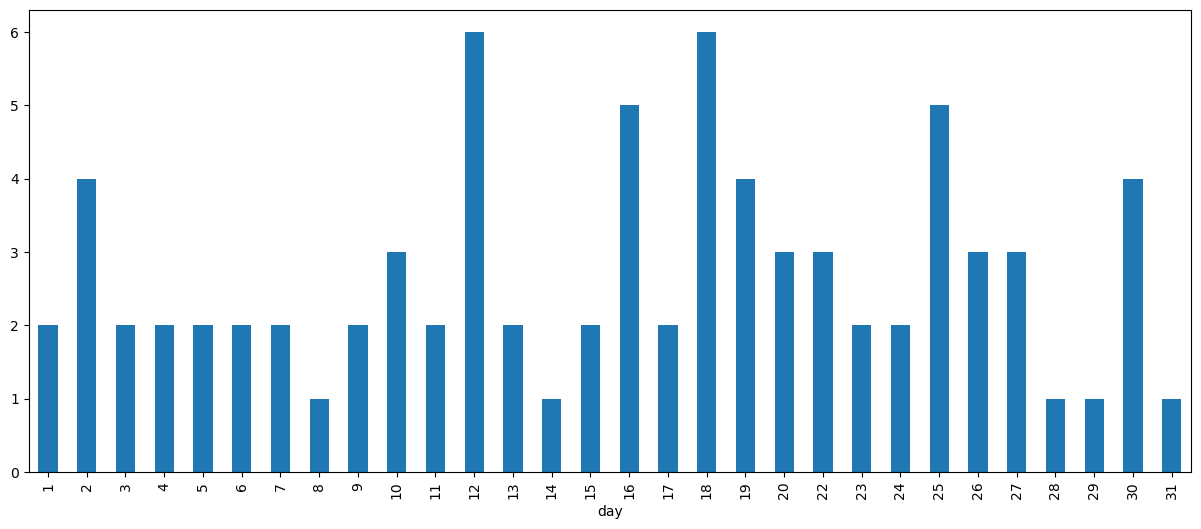

In [445]:
# Count of each day of the month
data.day.value_counts().sort_index().plot(kind='bar', figsize=(15, 6))

In [446]:
# Since the day represent the friday of the week, it doesn't provide information on the day itself, rather it provides information on the week of the month. 
# Since we have a few values that appear only once, we will impute them with the closest day.
# Show the days that appear only once
data['day'].value_counts()[data['day'].value_counts() == 1]

day
14    1
28    1
31    1
29    1
8     1
Name: count, dtype: int64

<Axes: xlabel='day'>

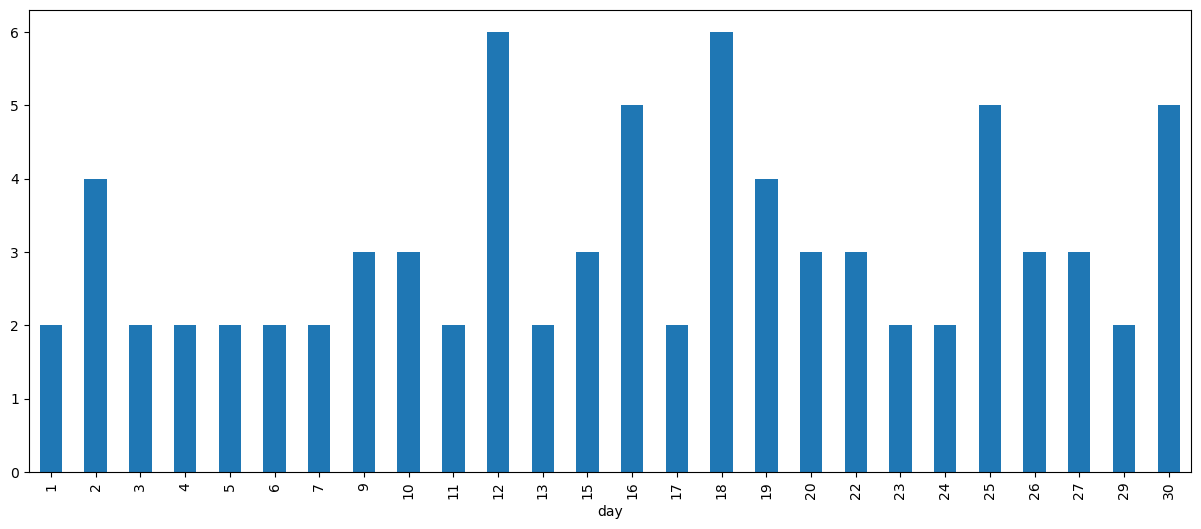

In [447]:
# Change days appearing only once to the closest day
data['day'] = np.where(data['day'] == 31, 30, data['day'])
data['day'] = np.where(data['day'] == 8, 9, data['day'])
data['day'] = np.where(data['day'] == 28, 29, data['day'])
data['day'] = np.where(data['day'] == 14, 15, data['day'])

# Count of each day of the month
data.day.value_counts().sort_index().plot(kind='bar', figsize=(15, 6))

- **Separation of Variables:**
  - Separate the variable X ('Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'day', 'month') and the target y (Weekly Sales).

In [448]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
'CPI', 'Unemployment', 'day', 'month', 'year']
target_variable = "Weekly_Sales"

X = data.loc[:,features_list]
Y = data.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    1572117.54
1    1807545.43
4    1644470.66
6     695396.19
7    2203523.20
Name: Weekly_Sales, dtype: float64

X :
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0    6.0           NaN        59.61       3.045  214.777523         6.858   
1   13.0           0.0        42.38       3.435  128.616064         7.470   
4    6.0           0.0        78.89       2.759  212.412888         7.092   
6   15.0           0.0        69.80       4.069  134.855161         7.658   
7   20.0           0.0        39.93       3.617  213.023622         6.961   

   day  month  year  
0   18      2  2011  
1   25      3  2011  
4   29      5  2010  
6    3      6  2011  
7    3      2  2012  


- **Data Splitting:**
  - Split the variables into training set and test set.

In [449]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [450]:
X_train.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
6,15.0,0.0,69.80,4.069,134.855161,7.658,3,6,2011
38,4.0,0.0,81.85,3.570,129.066300,5.946,24,6,2011
12,7.0,0.0,36.61,3.767,192.826069,8.595,13,5,2011
44,1.0,1.0,38.51,2.548,211.242170,8.106,12,2,2010
66,18.0,0.0,73.67,2.792,132.614193,9.342,6,8,2010


- **Preprocessing:**
  - Numerical transformer:
    - Use `SimpleImputer` to replace missing values.
    - Use `StandardScaler` to normalize the values.
  - Categoricla transformer:
    - Use `SimpleImputer` to replace missing values.
    - Use `OneHotEncoder` to convert variables into binary columns.

In [451]:
numeric_features = ['Temperature', 'Fuel_Price', 'CPI',
'Unemployment', 'day', 'month', 'year']
categorical_features = ['Store', 'Holiday_Flag']

print('Numeric features ', numeric_features)
print('Categorical features ', categorical_features)

Numeric features  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'day', 'month', 'year']
Categorical features  ['Store', 'Holiday_Flag']


In [452]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # missing values will be replaced by columns' median
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [453]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()


Performing preprocessings on train set...
    Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
6    15.0           0.0        69.80       4.069  134.855161         7.658   
38    4.0           0.0        81.85       3.570  129.066300         5.946   
12    7.0           0.0        36.61       3.767  192.826069         8.595   
44    1.0           1.0        38.51       2.548  211.242170         8.106   
66   18.0           0.0        73.67       2.792  132.614193         9.342   

    day  month  year  
6     3      6  2011  
38   24      6  2011  
12   13      5  2011  
44   12      2  2010  
66    6      8  2010  
...Done.
[[ 0.58589224  1.56199819 -1.05536176  0.30814094 -1.46256295 -0.1099386
   0.18751465  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.        ]
 [ 1.28430802  0.5704465  -1.20398254 -1.503

In [454]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_test.head())
X_test = preprocessor.transform(X_test)
print('...Done.')
print(X_test[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()


Performing preprocessings on train set...
     Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
85     2.0           0.0        44.69       2.976  211.064888         8.028   
45     2.0           0.0        54.63       3.555  220.275944         7.057   
48     1.0           NaN        91.65       3.684  215.544618         7.962   
144    3.0           0.0        73.44       3.594  226.968844         6.034   
73     1.0           NaN        85.22       2.619  211.567306         7.787   

     day  month  year  
85     7      1  2011  
45    24      2  2012  
48     5      8  2011  
144   19     10  2012  
73    27      8  2010  
...Done.
[[-0.86947875 -0.60987756  0.90121453  0.69957796 -0.99687126 -1.78519352
   0.18751465  1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [-0.29335818  0.54064033  1.13

In [455]:
# Apply the function to preprocessor
feature_names_after_preprocessing = get_feature_names(preprocessor)

**Linear Regression Model:**
  - Declare the Linear Regression model.
  - Fit the model on `X_train` and `y_train`.
  - Apply the model to predict `y_train` and `y_test`.

In [456]:
# Train model with cross validation
print("Train model with cross validation...")
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, Y_train)
scores_linear = cross_val_score(regressor_linear, X_train, Y_train, cv=5, scoring='r2')
print("...Done.")

#   Print all scores
print("All scores:", scores_linear)
print("Mean:", scores_linear.mean())
print("Standard deviation:", scores_linear.std())

# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor_linear.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor_linear.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Train model with cross validation...
...Done.
All scores: [0.91429951 0.94223615 0.95637648 0.92390237 0.95618075]
Mean: 0.9385990506645495
Standard deviation: 0.01699906750130254
Predictions on training set...
...Done.
[ 661631.00013228 2062730.00166793  486990.05290068 1579301.4838209
 1096194.24160924 2133452.18583318 2519363.18184674 1238736.93654909
 2016046.7981823   454362.86356391  916635.24457536 1757242.51
 1137724.57607114  331483.65107536 2197222.72376658 2150072.24367414
 1916812.74       2000963.83899114  206854.98936677  651032.344397
 2369472.90271875  506550.0013972  1559451.04363923  466129.7364361
  469372.72006197 1937790.97134487 1891691.16012393 2072252.46621631
  502611.95345327 1405801.89490892 1554989.46169463  590836.12157384
 1551728.86403396  589730.62974935  897622.2018425  1902807.71317404
  800713.75084084 1613942.27081903 2088325.31517568 1366038.41603709
  814614.12220834 1384576.22732709  823266.46183769  482245.04479843
 1322215.39114385 1536163.31554

In [457]:
# Metrics for the model evaluation
print("Metrics for the model evaluation...")
r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

# Metrics for model evaluation
print("MSE : ", mean_squared_error(Y_test, Y_test_pred))
print("RMSE : ", np.sqrt(mean_squared_error(Y_test, Y_test_pred))
)
print("Variance : ", np.var(Y_test))
print("RMSE / Variance : ", np.sqrt(mean_squared_error(Y_test, Y_test_pred)) / np.var(Y_test))
print("RMSE / (max(Y) - min(Y)) : ", np.sqrt(mean_squared_error(Y_test, Y_test_pred)) / (np.max(Y_test) - np.min(Y_test)))

Metrics for the model evaluation...
R2 score on training set :  0.9836403236425122
R2 score on test set :  0.958478224751336
MSE :  19272104648.15662
RMSE :  138824.00602257744
Variance :  464144524956.8598
RMSE / Variance :  2.9909650670872507e-07
RMSE / (max(Y) - min(Y)) :  0.07882849116672092


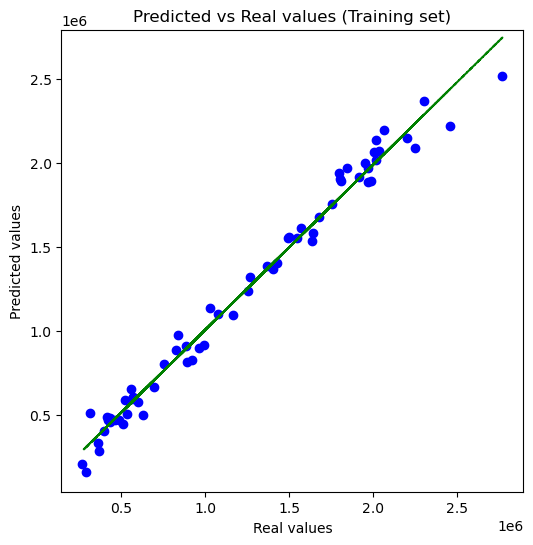

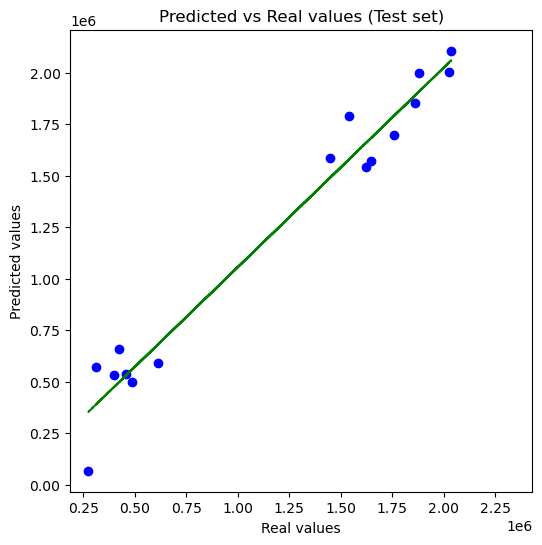

In [458]:
# Visualize the predictions on the training set
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, Y_train_pred, color = 'blue')
plt.title('Predicted vs Real values (Training set)')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.axis('equal')
plt.axis('square')
# Add trend line
z = np.polyfit(Y_train, Y_train_pred, 1) # 1st degree polynomial
p = np.poly1d(z) # create a polynomial function
plt.plot(Y_train, p(Y_train), "g--")
plt.show()

# Visualize the predictions on the test set
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_test_pred, color = 'blue')
plt.title('Predicted vs Real values (Test set)')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.axis('equal')
plt.axis('square')
# Add trend line
z = np.polyfit(Y_test, Y_test_pred, 1) # 1st degree polynomial
p = np.poly1d(z) # create a polynomial function
plt.plot(Y_test, p(Y_test), "g--")
plt.show()

In [459]:
# Create a DataFrame that links coefficients with feature names
coefs = pd.DataFrame(regressor_linear.coef_, index=feature_names_after_preprocessing, columns=['Coefficient'])
coefs = coefs.abs().sort_values(by='Coefficient', ascending=False)
print(coefs)

                   Coefficient
Store_4.0         4.016539e+06
Store_10.0        3.945921e+06
Store_13.0        3.906363e+06
Store_19.0        3.172137e+06
Store_18.0        2.841864e+06
Store_17.0        2.563455e+06
Store_15.0        2.471839e+06
Store_14.0        1.792092e+06
CPI               1.628949e+06
Store_5.0         1.498998e+06
Store_3.0         1.459458e+06
Store_9.0         1.454327e+06
Store_8.0         1.000405e+06
Store_20.0        6.148805e+05
Store_16.0        3.111022e+05
Store_2.0         1.765966e+05
Holiday_Flag_1.0  1.328790e+05
Store_7.0         1.271842e+05
year              9.629402e+04
Unemployment      9.377441e+04
Fuel_Price        8.397845e+04
Store_6.0         6.866374e+04
Store_11.0        5.973327e+04
Temperature       5.722450e+04
day               4.689412e+04
month             3.862231e+04


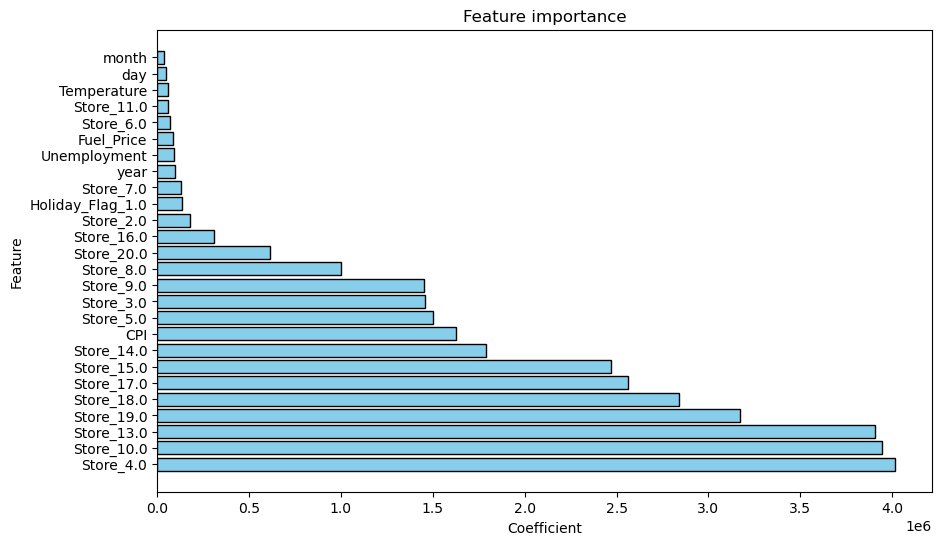

In [460]:
# The coefficients of the linear regression model show that the most important features are the store number, and the CPI. The store number is the most important feature,

# Feature importance
plt.figure(figsize=(10, 6))
plt.barh(coefs.index, coefs['Coefficient'], color='skyblue', edgecolor='black')
plt.title('Feature importance')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


In [461]:
# Store results
results = results._append({
    'Model': 'Linear Regression',
    'CrossVal mean': scores_linear.mean(),
    'CrossVal std': scores_linear.std(),
    'R2 train score': r2_train,
    'R2 test score': r2_test,
    'RMSE/(Max - Min)': np.sqrt(mean_squared_error(Y_test, Y_test_pred)) / (np.max(Y_test) - np.min(Y_test))
}, ignore_index=True)

**Ridge Model:**
  - Declare the Ridge model.
  - Fit the model on `X_train` and `y_train`.
  - Apply the model to predict `y_train` and `y_test`.

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.0001}
Best R2 score :  0.9376427225995176


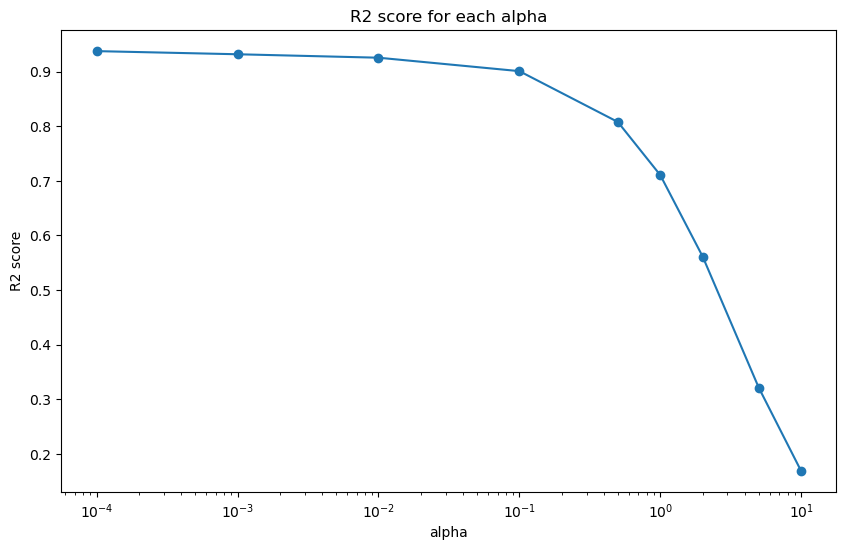

In [462]:
# Perform grid search to find alpha
print("Grid search...")
regressor_ridge = Ridge()
# Grid of values to be tested
params = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5, 10], # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(regressor_ridge, param_grid = params, cv = 5) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

# Plot the R2 score for each alpha
plt.figure(figsize=(10, 6))
plt.plot([0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5, 10], gridsearch.cv_results_['mean_test_score'], marker='o')
plt.title('R2 score for each alpha')
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.xscale('log')
plt.show()

In [463]:
# Perform 5-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
#We continue with Alpha = 0.1 based on gridsearch results.
print("5-fold cross-validation...")
regressor_ridge = Ridge(alpha=0.1)
regressor_ridge.fit(X_train, Y_train)
scores_ridge = cross_val_score(regressor_ridge, X_train, Y_train, cv=5, scoring='r2')
print("...Done.")

# Print all the scores
print("All scores : ", scores_ridge)
print('The cross-validated R2-score is : ', scores_ridge.mean())
print('The standard deviation is : ', scores_ridge.std())
print()

# Predictions on training set
print("Predictions on training set...")
Y_train_pred_ridge = regressor_ridge.predict(X_train)
print("...Done.")

# Predictions on test set
print("Predictions on test set...")
Y_test_pred_ridge = regressor_ridge.predict(X_test)
print("...Done.")



5-fold cross-validation...
...Done.
All scores :  [0.82892278 0.93551156 0.92603743 0.86980387 0.94463363]
The cross-validated R2-score is :  0.9009818540257439
The standard deviation is :  0.044475020966266966

Predictions on training set...
...Done.
Predictions on test set...
...Done.


In [464]:
# Metrics for the model evaluation
print("Metrics for the model evaluation...")
r2_train_ridge = r2_score(Y_train, Y_train_pred_ridge)
r2_test_ridge = r2_score(Y_test, Y_test_pred_ridge)

# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred_ridge))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred_ridge))

# Metrics for model evaluation
print("MSE : ", mean_squared_error(Y_test, Y_test_pred_ridge))
print("RMSE : ", np.sqrt(mean_squared_error(Y_test, Y_test_pred_ridge)))
print("Variance : ", np.var(Y_test))
print("RMSE / Variance : ", np.sqrt(mean_squared_error(Y_test, Y_test_pred_ridge)) / np.var(Y_test))
print("RMSE / (max(Y) - min(Y)) : ", np.sqrt(mean_squared_error(Y_test, Y_test_pred_ridge)) / (np.max(Y_test) - np.min(Y_test)))

Metrics for the model evaluation...
R2 score on training set :  0.9775436013014033
R2 score on test set :  0.9827788392554367
MSE :  7993107472.991013
RMSE :  89404.18039997354
Variance :  464144524956.8598
RMSE / Variance :  1.9262142628588211e-07
RMSE / (max(Y) - min(Y)) :  0.05076641170966542


In [465]:
# Ridge model feature importance
coefs_ridge = pd.DataFrame(regressor_ridge.coef_, index=feature_names_after_preprocessing, columns=['Coefficient'])
coefs_ridge = coefs_ridge.abs().sort_values(by='Coefficient', ascending=False)
print(coefs_ridge)


                   Coefficient
Store_5.0         1.131752e+06
Store_3.0         1.099140e+06
Store_9.0         9.763117e+05
Store_7.0         9.690327e+05
Store_16.0        8.730408e+05
Store_4.0         8.332837e+05
Store_15.0        6.702338e+05
Store_17.0        6.236278e+05
Store_14.0        6.037213e+05
Store_13.0        5.852644e+05
Store_8.0         5.713076e+05
Store_20.0        4.850093e+05
Store_10.0        4.384878e+05
Store_18.0        3.917448e+05
Store_11.0        2.718301e+05
Store_2.0         2.434787e+05
Store_6.0         1.704482e+05
Fuel_Price        1.061961e+05
year              8.464382e+04
Holiday_Flag_1.0  8.191487e+04
month             4.872378e+04
day               4.818046e+04
CPI               4.764766e+04
Temperature       4.194653e+04
Store_19.0        1.701748e+04
Unemployment      1.289480e+04


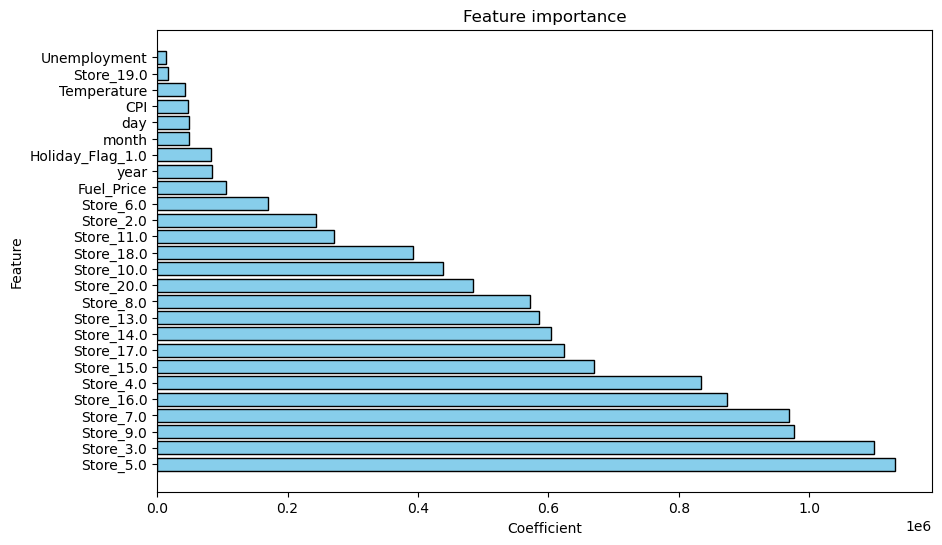

In [466]:
# Plot ridge model feature importance
plt.figure(figsize=(10, 6))
plt.barh(coefs_ridge.index, coefs_ridge['Coefficient'], color='skyblue', edgecolor='black')
plt.title('Feature importance')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


In [467]:
# Store results
results = results._append({
    'Model': 'Ridge Regression',
    'CrossVal mean': scores_ridge.mean(),
    'CrossVal std': scores_ridge.std(),
    'R2 train score': r2_train_ridge,
    'R2 test score': r2_test_ridge,
    'RMSE/(Max - Min)': np.sqrt(mean_squared_error(Y_test, Y_test_pred_ridge)) / (np.max(Y_test) - np.min(Y_test))
}, ignore_index=True)

**Lasso Model:**
  - Declare the Lasso model.
  - Fit the model on `X_train` and `y_train`.
  - Apply the model to predict `y_train` and `y_test`.

Grid search...
...Done.
Best hyperparameters :  {'alpha': 20}
Best R2 score :  0.9272148301975296


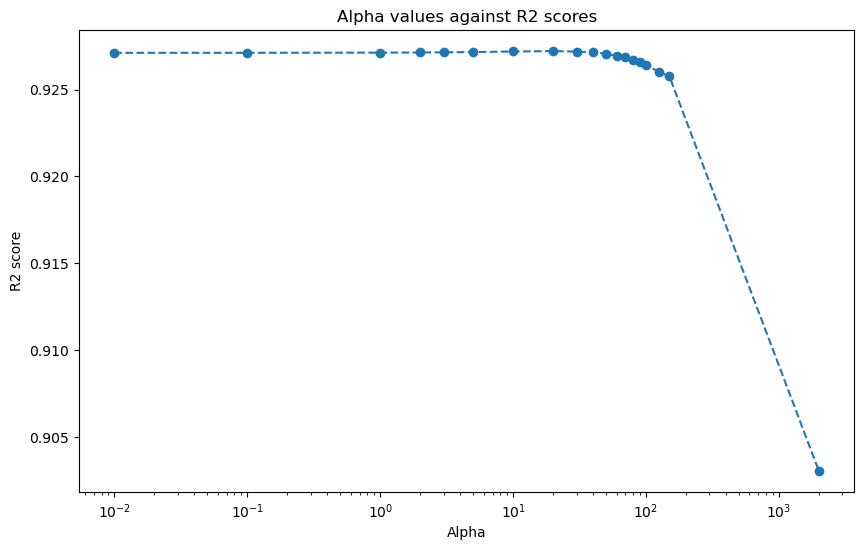

In [468]:
# Perform grid search
print("Grid search...")
regressor_lasso = Lasso()
# Grid of values to be tested
params = {
    'alpha': [0.01, 0.1, 1, 2, 3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 2000] # 0 corresponds to no regularization
}
best_lasso = GridSearchCV(regressor_lasso, param_grid = params, cv = 5) # cv : the number of folds to be used for CV
best_lasso.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", best_lasso.best_params_)
print("Best R2 score : ", best_lasso.best_score_)

# Plot the alpha values against the R2 scores
plt.figure(figsize=(10, 6))
plt.plot(params['alpha'], best_lasso.cv_results_['mean_test_score'], marker='o', linestyle='--')
plt.title('Alpha values against R2 scores')
plt.xlabel('Alpha')
plt.ylabel('R2 score')
plt.xscale('log')
plt.show()

In [469]:
# Perform 5-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
# We continue with alpha = 10 based on gridsearch results
print("5-fold cross-validation...")
regressor_lasso = Lasso(alpha=10)
regressor_lasso.fit(X_train, Y_train)
scores_lasso = cross_val_score(regressor_lasso, X_train, Y_train, cv=5)
print('The cross-validated R2-score is : ', scores_lasso.mean())
print('The standard deviation is : ', scores_lasso.std())

# Predictions on training set
print("Predictions on training set...")
Y_train_pred_lasso = regressor_lasso.predict(X_train)
print("...Done.")

# Predictions on test set
print("Predictions on test set...")
Y_test_pred_lasso = regressor_lasso.predict(X_test)
print("...Done.")


5-fold cross-validation...
The cross-validated R2-score is :  0.9271932310727582
The standard deviation is :  0.022036822767754847
Predictions on training set...
...Done.
Predictions on test set...
...Done.


In [470]:
# Metrics for the model evaluation
print("Metrics for the model evaluation...")
r2_train_lasso = r2_score(Y_train, Y_train_pred_lasso)
r2_test_lasso = r2_score(Y_test, Y_test_pred_lasso)

# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred_lasso))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred_lasso))

# Metrics for model evaluation
print("MSE : ", mean_squared_error(Y_test, Y_test_pred_lasso))
print("RMSE : ", np.sqrt(mean_squared_error(Y_test, Y_test_pred_lasso)))
print("Variance : ", np.var(Y_test))
print("RMSE / Variance : ", np.sqrt(mean_squared_error(Y_test, Y_test_pred_lasso)) / np.var(Y_test))
print("RMSE / (max(Y) - min(Y)) : ", np.sqrt(mean_squared_error(Y_test, Y_test_pred_lasso)) / (np.max(Y_test) - np.min(Y_test)))

Metrics for the model evaluation...
R2 score on training set :  0.9819918354175421
R2 score on test set :  0.9735615283618706
MSE :  12271271859.065006
RMSE :  110775.77288859242
Variance :  464144524956.8598
RMSE / Variance :  2.3866655089573346e-07
RMSE / (max(Y) - min(Y)) :  0.06290185166688626


We obtain very similar results as previously obtained with Ridge

In [471]:
# Lasso model feature importance
coefs_lasso = pd.DataFrame(regressor_lasso.coef_, index=feature_names_after_preprocessing, columns=['Coefficient'])
coefs_lasso = coefs_lasso.abs().sort_values(by='Coefficient', ascending=False)
print(coefs_lasso)


                   Coefficient
Store_5.0         1.435711e+06
Store_3.0         1.328011e+06
Store_9.0         1.322973e+06
Store_4.0         1.141066e+06
Store_16.0        1.024798e+06
Store_13.0        9.876449e+05
Store_10.0        9.343353e+05
Store_7.0         9.025734e+05
Store_8.0         8.683783e+05
Store_14.0        7.601334e+05
Store_19.0        4.446864e+05
Store_20.0        3.799796e+05
Store_17.0        3.292077e+05
CPI               3.148332e+05
Store_15.0        2.755537e+05
Store_11.0        1.463693e+05
Holiday_Flag_1.0  1.386943e+05
Store_2.0         1.254943e+05
Fuel_Price        9.731822e+04
Store_18.0        8.622178e+04
Unemployment      6.553289e+04
Temperature       5.320075e+04
month             5.314605e+04
day               4.776046e+04
Store_6.0         3.692609e+04
year              3.123540e+04


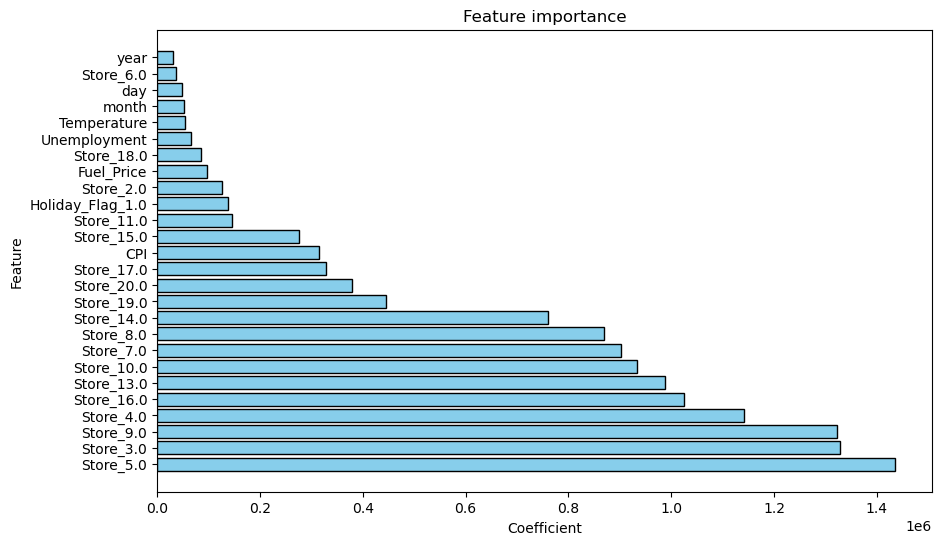

In [472]:
# Plot lasso model feature importance
plt.figure(figsize=(10, 6))
plt.barh(coefs_lasso.index, coefs_lasso['Coefficient'], color='skyblue', edgecolor='black')
plt.title('Feature importance')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


In [473]:
# Store results
results = results._append({
    'Model': 'Lasso Regression',
    'CrossVal mean': scores_lasso.mean(),
    'CrossVal std': scores_lasso.std(),
    'R2 train score': r2_train_lasso,
    'R2 test score': r2_test_lasso,
    'RMSE/(Max - Min)': np.sqrt(mean_squared_error(Y_test, Y_test_pred_lasso)) / (np.max(Y_test) - np.min(Y_test))
}, ignore_index=True)

#   Conclusion

In [474]:
# Display the results
print("Results of the models")
display(results)

Results of the models


,Model,CrossVal mean,CrossVal std,R2 train score,R2 test score,RMSE/(Max - Min)
0,Baseline Linear Regression,0.071889,0.276485,0.202596,0.086669,0.337533
1,Linear Regression,0.938599,0.016999,0.983640,0.958478,0.078828
2,Ridge Regression,0.900982,0.044475,0.977544,0.982779,0.050766
3,Lasso Regression,0.927193,0.022037,0.981992,0.973562,0.062902


In [475]:
# Conclusion
# The various multivarible models perform much better than the baseline,
# Some variance is present in the crossvalidation scores, but the R2 score is quite high.
# The R2 score of train and test set is quite similar, which is a good sign of a good model.
# The RMSE/(Max - Min) is quite low, which is a good sign of a good model.
# Ridge model has a low alpha, which means that the regularization is not very strong.
# Lasso model has s very weak effect of the regularization, which means that the regularization is not very strong.
# The similar results between the models are not surprising in that aspect, as they are quite close.